In [ ]:
from zipfile import ZipFile

In [ ]:
data = "/content/drive/MyDrive/Datasets/Covid19 Prediction.zip"

In [ ]:
with ZipFile(data,"r") as zip:
  zip.printdir()
  zip.extractall()

File Name                                             Modified             Size
xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg 2020-03-19 01:50:02       136837
xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg 2020-03-19 01:50:02       269774
xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0058-0001.jpeg 2020-03-19 01:50:02       161005
xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0059-0001.jpeg 2020-03-19 01:50:02       299291
xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0072-0001.jpeg 2020-03-19 01:50:02       159759
xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0073-0001.jpeg 2020-03-19 01:50:02       276319
xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0092-0001.jpeg 2020-03-19 01:50:02       155551
xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0105-0001.jpeg 2020-03-19 01:50:02       226013
xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0110-0001.jpeg 2020-03-19 01:50:02       277066
xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0111-0001.jpeg 2020-03-19 01:50:02       176049


## Import the Libraries

In [ ]:
import tensorflow as tf
import cv2 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

## To check the images

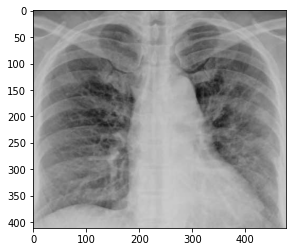

In [ ]:
plt.imshow(cv2.imread("/content/xray_dataset_covid19/train/PNEUMONIA/1-s2.0-S1684118220300608-main.pdf-001.jpg"))

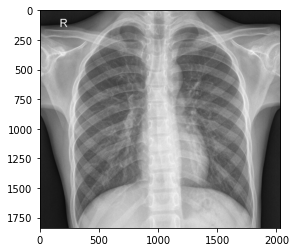

In [ ]:
plt.imshow(cv2.imread("/content/xray_dataset_covid19/train/NORMAL/IM-0005-0001.jpeg"))

# Train dataset into tarining and validation set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/xray_dataset_covid19/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 148 images belonging to 2 classes.


In [ ]:
#Preprocessing Validation set

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    '/content/xray_dataset_covid19/test', 
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 40 images belonging to 2 classes.


## Building the Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Compile the Model

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the model on the training set and evalauting the validation set

In [ ]:
model.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
5/5 [==============================] - 8s 2s/step - loss: 0.7414 - accuracy: 0.5270 - val_loss: 0.7232 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 7s 1s/step - loss: 0.6863 - accuracy: 0.5000 - val_loss: 0.6681 - val_accuracy: 0.5000
Epoch 3/25
5/5 [==============================] - 7s 1s/step - loss: 0.6699 - accuracy: 0.5878 - val_loss: 0.6444 - val_accuracy: 0.5000
Epoch 4/25
5/5 [==============================] - 7s 1s/step - loss: 0.6521 - accuracy: 0.5541 - val_loss: 0.5737 - val_accuracy: 0.9750
Epoch 5/25
5/5 [==============================] - 7s 1s/step - loss: 0.5957 - accuracy: 0.7905 - val_loss: 0.4556 - val_accuracy: 0.9750
Epoch 6/25
5/5 [==============================] - 7s 2s/step - loss: 0.4884 - accuracy: 0.8446 - val_loss: 0.2665 - val_accuracy: 0.9750
Epoch 7/25
5/5 [==============================] - 7s 1s/step - loss: 0.3913 - accuracy: 0.8446 - val_loss: 0.2626 - val_accuracy: 0.9250
Epoch 8/25
5/5 [=========================

# Making a prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'covid risk'
else:
  prediction = 'normal'

In [ ]:
print(prediction)

covid risk
